In [29]:
import os
import numpy as np
import cv2 
import pytesseract
from matplotlib import pyplot as plt

In [2]:
folderPath = os.getcwd() + '/Imgs'

In [12]:
os.listdir(folderPath)

['sample 9.jpg',
 'sample 1.jpeg',
 'sample 13.jpg',
 'sample 12.jpg',
 'sample 10.jpg',
 'sample 11.jpg',
 'sample 6.jpeg',
 'samlpe 7.jpg',
 'sample 8.jpeg',
 'sample 3.jpeg',
 'sample 2.jpeg']

In [88]:

def crop_image(image):
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the largest contour
    # max_contour = max(contours, key=cv2.contourArea)
    # print(max_contour)

    filtered_contours = []
    for contour in contours:
        if cv2.contourArea(contour) > 100:
            filtered_contours.append(contour)
    print(filtered_contours)
    # Get bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(filtered_contours[0])
    
    # Crop the image using the bounding box
    cropped_image = image[y:y+h, x:x+w]
    # cropped_image = image
    
    return cropped_image

def change_perspective(image):
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)
    
    # Get the convex hull of the largest contour
    hull = cv2.convexHull(max_contour)
    
    # Apply perspective transformation
    rect = cv2.minAreaRect(hull)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    width = int(rect[1][0])
    height = int(rect[1][1])
    src_pts = box.astype("float32")
    dst_pts = np.array([[0, height-1], [0, 0], [width-1, 0], [width-1, height-1]], dtype="float32")
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    corrected_image = cv2.warpPerspective(image, M, (width, height))
    
    return corrected_image


def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to binarize the image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    
    # Further denoising if needed
    # denoised = cv2.fastNlMeansDenoising(binary, None, h=100, templateWindowSize=7, searchWindowSize=21)

    # Crop image to remove unnecessary parts
    # cropped_image = crop_image(denoised)
    
    # Change perspective to correct any skew
    # corrected_image = change_perspective(cropped_image)
    
    return binary

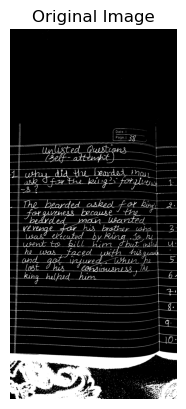

Recognized Text:



In [87]:
img = os.listdir(folderPath)[0]
img = cv2.imread(os.path.join(folderPath, img))
recognized_text = pytesseract.image_to_string(img)
plt.imshow(preprocess_image(img), cmap='gray')
# plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

print("Recognized Text:")
print(recognized_text)

Recognized Text:



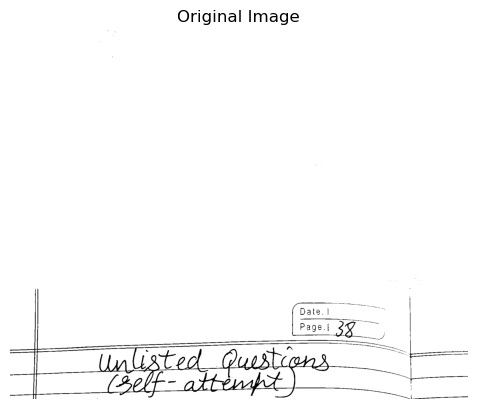

Recognized Text:
———
i ie pe
: et eee Fath stakes




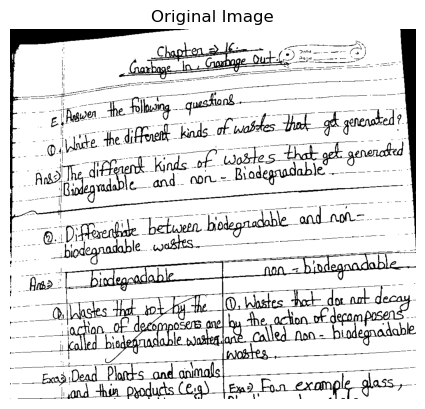

Recognized Text:
| \ Date. |
| ‘Page. BO




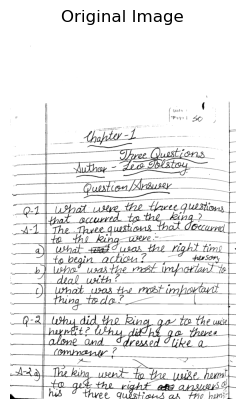

Recognized Text:
PCV Vit
Os Abhiy) fygrel_s

The.

that TY ‘we ave

dealitrg. ~

| yecesKar iy 41
| goad ta him

é (FV) ANVICA

U c
v7. ¢, @
C4 2) thik Vnyce Leda

dal

(9 thie tel

atfalv, Present

LS

()
| / SLAW /AI!: JOY,
| ZA VL 0A

Mm Orme

Oh
| Signutlcar
OldmM (LA
i (

‘ Q
C ANAC

ONL OfASAG

() /
aI

4A) MALLYA A]

O
4}

lle ag

Ub aT




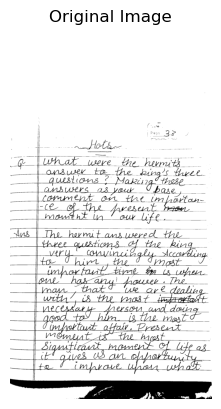

Recognized Text:



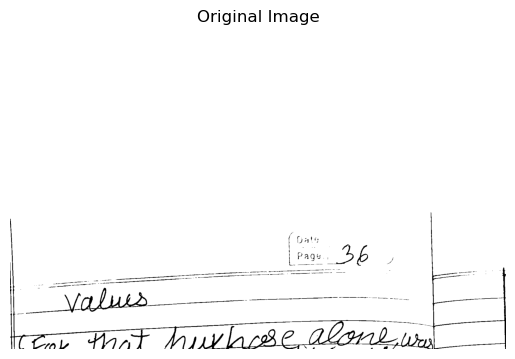

Recognized Text:
Date. }

7Page | AO

\ oe

PTR Dettes,




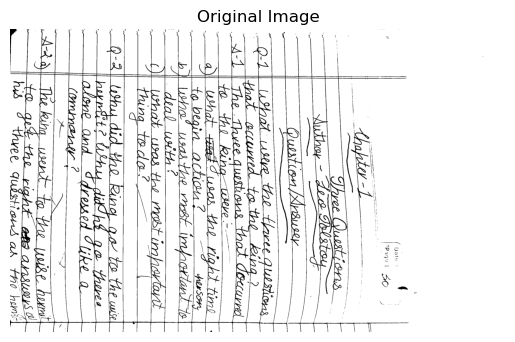

Recognized Text:
—
. yDiscvss He di Ffeve,J wa

Fi tx6,,)

2mm end £4 imp%ve and p=
FOV, dle |

palt, Er VICES axe xyn, Fox profit, Wl?

ww! P tre ast of Hese Sea Wigeu s sathe igh

Zorir alsa ¢ We

3 eq) by “ei chean habits. i

IS

WuG at 4—

Mthad Sonwou. derstand by health 2.
ste of Come ehcp r ‘cad ments

soolal wall beings od net nately

ho of,
U

COmpter’




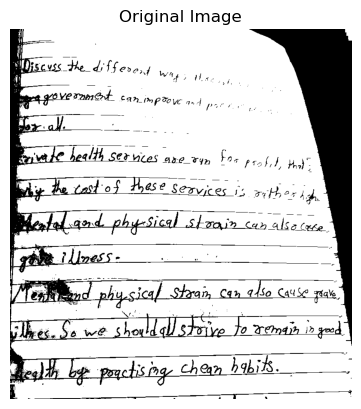

Recognized Text:
Qe eae a
am tre. J

Me tok Aw mony ste
brm™ :



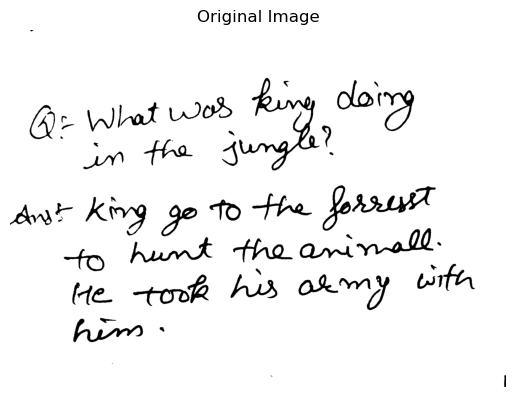

Recognized Text:
\

of geccmand aol

ie pepsrgt pet =f Yor eo

a

(xfpeo

lee fo

ape p.
PES Cele pat

itt few be VG RL Bo!

Ci 2grs-

bJeE Chir te LAG of bot [Wwe &

110. Adbiwe0yeene. hoop

ve Ldd_piud> ovKe (os

foc porte.
Marde Wie cy pee
ave GrA A;'el sepeish

| EW EAS =
@

aTad aaa hee




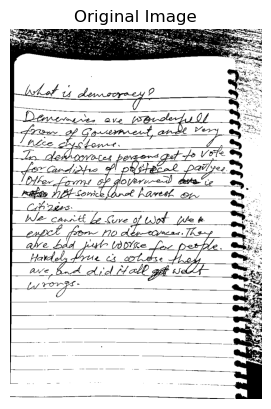

Recognized Text:
NE Si
(#) Bes

|

[|

|

BI

|

|

i

|
y) Oe

ss

—— oe

ee ele ze ‘Raves Th kind ee +

Ac. 7
“4 <a se yp

af ag aoa ana oe Anle tp ‘a A_Veny msn

aa a ap iy GAO Hnote om Tre Qe

INEM

- Explain Now desert platits

9 (
on Th nor Gna any Mare




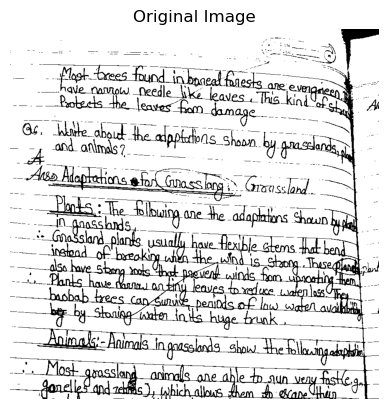

Recognized Text:



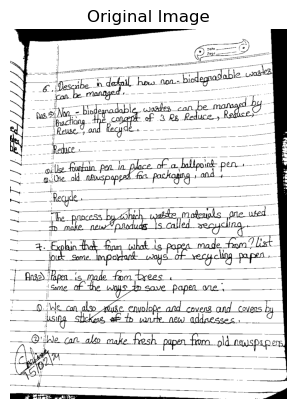

In [20]:
# Iterate through each image in the folder
for image in os.listdir(folderPath):
    # Read the image
    img = cv2.imread(os.path.join(folderPath, image))
    
    # Perform OCR using Tesseract
    recognized_text = pytesseract.image_to_string(img)
    
    # Print the recognized text
    print("Recognized Text:")
    print(recognized_text)
    # preprocess_image(```
    # Display the image
    plt.imshow(img,cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
